<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-Routine" data-toc-modified-id="Plotting-Routine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting Routine</a></span></li><li><span><a href="#Apples-and-Bananas" data-toc-modified-id="Apples-and-Bananas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Apples and Bananas</a></span><ul class="toc-item"><li><span><a href="#The-Puzzle" data-toc-modified-id="The-Puzzle-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The Puzzle</a></span></li><li><span><a href="#Variation-1" data-toc-modified-id="Variation-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variation 1</a></span></li><li><span><a href="#Variation-2" data-toc-modified-id="Variation-2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variation 2</a></span></li></ul></li></ul></div>

In [3]:
# Import required library
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Plotting Routine

In [12]:
def line(A,b,i,x):
    return (b[i]-A[i][0]*x)/A[i][1]

def grad(c,g,x):
    return (g-c[0]*x)/c[1]

def MIN(a, b):
    return b if a==None else a if b==None else min(a,b)

def MAX(a, b):
    return b if a==None else a if b==None else max(a,b)
    
def plot_linopt(A, b, c, bounds, res, 
                borders=None, dx=5, dy=5,
                title=None, labels=None, 
                solution=None, legend=None, output=False):
 
    ax=plt.axes()
    ax.grid(True)
    
    if borders==None:
        borders=[(res.x[0]-dx, res.x[0]+dx),
                 (res.x[1]-dy, res.x[1]+dy)]
    
    # set drawing region (xmin, xmax) (ymin, ymax)
    xmin = borders[0][0]
    xmax = borders[0][1]
    ymin = borders[1][0]
    ymax = borders[1][1]
    
    ax.set_xlim((xmin,xmax))
    ax.set_ylim((ymin,ymax))
    if labels!=None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

    if legend==None:
        legend=[]
        for i in range(0, len(A)):
            legend+=['Constraint '+str(i)]
    
    if solution==None:
        solution='Solution'
        

    
    # compute visual bounds (drawing limits if there is no bound)
    xleft = MAX(bounds[0][0], borders[0][0])
    xright = MIN(bounds[0][1], borders[0][1])
    ybottom = MAX(bounds[1][0], borders[1][0]) 
    ytop = MIN(bounds[1][1], borders[1][1])
    
    # plot constraints
    x=[xmin,xmax]
    lines=[]
    for i in range(0, len(A)):
        y = [line(A,b,i,xmin), line(A,b,i,xmax)]
        l=plt.plot(x,y,label=legend[i])
        plt.fill_between(x, y, ymin if A[i][1]>0 else ymax, alpha=0.3)
        lines=lines+[l[0]]
    
    # plot bounding box
    rangex=[xleft, xright, xright, xleft, xleft]
    rangey=[ybottom, ybottom, ytop, ytop, ybottom]
    l=plt.plot(rangex, rangey,label='Bounds')
    plt.fill_between(rangex, rangey, alpha=0.3)
    lines+=[l[0]]

    # plot optimal cost function
    x=[xmin,xmax]
    lopt=plt.plot(x, [grad(c,res.fun,xmin),grad(c,res.fun,xmax)], 
                  color='red', label=solution)    

    # plot optimal solution
    plt.plot(res.x[0],res.x[1],'ro')

    if legend!=None:
        plt.legend(handles=lines+[lopt[0]])
        
    if title!=None: 
        plt.suptitle(title)
    
    if output:
        print(solution, '=', res.fun)
        for i in range(0, len(c)):
            print(labels[i],'=',res.x[i])

#  Apples and Bananas

## The Puzzle

In [9]:
# Input parameters and bounds
A = [[-2,1], [1, -2]]
b = [0,0]
c = [-1, -1]
bounds=[(0, 9),(0, 4)]  # no more than 9 apples and 4 bananas

In [10]:
# Run the model
res = opt.linprog(c, A, b, bounds=bounds, method='simplex')

In [11]:
[apples, bananas]=res.x

In [12]:
apples

8.0

In [13]:
res

     con: array([], dtype=float64)
     fun: -12.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([12.,  0.])
  status: 0
 success: True
       x: array([8., 4.])

In [8]:
bananas

4.0

In [18]:
res.fun

-12.0

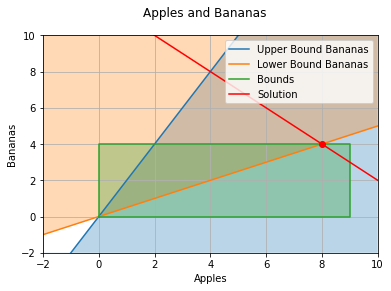

In [19]:
# Drawing 
# fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, bounds, res, 
            borders=[(-2, 10), (-2,10)], 
            title='Apples and Bananas',
            labels=['Apples', 'Bananas'], 
            legend=['Upper Bound Bananas', 
                    'Lower Bound Bananas'])

## Variation 1

Drop Positivity Condition 

In [20]:
bounds=[(None, 9),(None, 4)]  # no more than 9 apples and 4 bananas

In [21]:
res=opt.linprog(c, A, b, bounds=bounds, method='simplex')

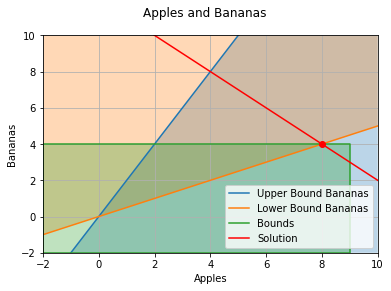

In [22]:
# fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, bounds, res, 
            borders=[(-2, 10), (-2,10)], 
            title='Apples and Bananas',
            labels=['Apples', 'Bananas'], 
            legend=['Upper Bound Bananas', 
                    'Lower Bound Bananas'])

## Variation 2

Automatic setting of drawing region around solution

In [23]:
bounds=[(0, 9),(0, 4)]  # no more than 9 apples and 4 bananas

In [24]:
res=opt.linprog(c, A, b, bounds=bounds, method='simplex')

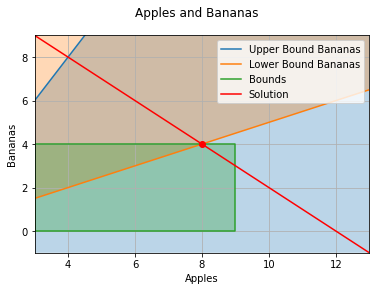

In [25]:
# fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, bounds, res, 
            title='Apples and Bananas',
            labels=['Apples', 'Bananas'], 
            legend=['Upper Bound Bananas', 
                    'Lower Bound Bananas'])